# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os

In [6]:
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [9]:
#creating a folder
folder_name = 'image_predictions'

if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [10]:
#create requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [11]:
#accessing content and writing to file
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [12]:
#let's check if our data has successfuly been written to the folder we created
os.listdir(folder_name)

['image-predictions.tsv']

In [13]:
#load data into pandas dataframe. I will use ipdata as a short for for image predictions data
ipdata = pd.read_csv('image_predictions/image-predictions.tsv', sep = '\t')
ipdata.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

In [15]:
#reading tweet.json line by line into a dataframe
# Inorder to do this, i will first create an empty list that will store the data
list_1 = []

json_file = open('tweet_json.txt', "r")

for ln in json_file:
    try:
        twt = json.loads(ln)
        #append twt into the empty list I created
        list_1.append(twt)
    except:
        continue
        
json_file.close()

In [16]:
#the next step will be to create a dataframe that has the columns tweet_id, retweet_count, favorite_count, created_at and full_text columns
tweet_data = pd.DataFrame()

tweet_data['tweet_id'] = list(map(lambda tweet: tweet['id'], list_1))
tweet_data['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], list_1))
tweet_data['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], list_1))
tweet_data['created_at'] = list(map(lambda tweet: tweet['created_at'], list_1))
tweet_data['full_text'] = list(map(lambda tweet: tweet['full_text'], list_1))

In [17]:
tweet_data.head()

,tweet_id,retweet_count,favorite_count,created_at,full_text
0,892420643555336193,8853,39467,Tue Aug 01 16:23:56 +0000 2017,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,6514,33819,Tue Aug 01 00:17:27 +0000 2017,This is Tilly. She's just checking pup on you....
2,891815181378084864,4328,25461,Mon Jul 31 00:18:03 +0000 2017,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,8964,42908,Sun Jul 30 15:58:51 +0000 2017,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,9774,41048,Sat Jul 29 16:00:24 +0000 2017,This is Franklin. He would like you to stop ca...


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Visual Assessment of the datasets

In [18]:
twitter_archive_df.head(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [19]:
ipdata.head(50)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [20]:
tweet_data.head(50)

,tweet_id,retweet_count,favorite_count,created_at,full_text
0,892420643555336193,8853,39467,Tue Aug 01 16:23:56 +0000 2017,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,6514,33819,Tue Aug 01 00:17:27 +0000 2017,This is Tilly. She's just checking pup on you....
2,891815181378084864,4328,25461,Mon Jul 31 00:18:03 +0000 2017,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,8964,42908,Sun Jul 30 15:58:51 +0000 2017,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,9774,41048,Sat Jul 29 16:00:24 +0000 2017,This is Franklin. He would like you to stop ca...
5,891087950875897856,3261,20562,Sat Jul 29 00:08:17 +0000 2017,Here we have a majestic great white breaching ...
6,890971913173991426,2158,12041,Fri Jul 28 16:27:12 +0000 2017,Meet Jax. He enjoys ice cream so much he gets ...
7,890729181411237888,16716,56848,Fri Jul 28 00:22:40 +0000 2017,When you watch your owner call another dog a g...
8,890609185150312448,4429,28226,Thu Jul 27 16:25:51 +0000 2017,This is Zoey. She doesn't want to be one of th...
9,890240255349198849,7711,32467,Wed Jul 26 15:59:51 +0000 2017,This is Cassie. She is a college pup. Studying...


### Programatic Assessment of datasets

##### twitter_archive_enhanced dataset

In [21]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [22]:
twitter_archive_df.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [23]:
twitter_archive_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [24]:
twitter_archive_df.duplicated().sum()

0

#### Image Predictions Dataset

In [25]:
ipdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
ipdata.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [27]:
ipdata.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [28]:
ipdata.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [29]:
ipdata.duplicated().sum()

0

In [30]:
ipdata.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
German_shepherd               20
Staffordshire_bullterrier     20
Siberian_husky                20
Cardigan                      19
web_site                      19
Shetland_sheepdog             18
beagle                        18
Maltese_dog                   18
Eskimo_dog                    18
teddy                         18
Shih-Tzu                      17
Lakeland_terrier              17
Rottweiler                    17
Italian_greyhound             16
kuvasz                        16
          

In [31]:
ipdata.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
French_bulldog                     41
Chesapeake_Bay_retriever           41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
Eskimo_dog                         27
collie                             27
Pembroke                           27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
malinois                           20
Samoyed                            20
toy_terrier                        20
miniature_pinscher                 20
chow                               20
Norwegian_elkhound                 19
Boston_bull                        19
Staffordshir

In [32]:
ipdata.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
beagle                            31
cocker_spaniel                    31
toy_poodle                        29
Pekinese                          29
Pomeranian                        29
Chesapeake_Bay_retriever          27
Great_Pyrenees                    27
Pembroke                          27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
b

In [33]:
ipdata.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

#### Twitter Data Dataset

In [34]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
created_at        2354 non-null object
full_text         2354 non-null object
dtypes: int64(3), object(2)
memory usage: 92.0+ KB


In [35]:
tweet_data.dtypes

tweet_id           int64
retweet_count      int64
favorite_count     int64
created_at        object
full_text         object
dtype: object

In [36]:
tweet_data.duplicated().sum()

0

In [37]:
tweet_data.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
created_at        0
full_text         0
dtype: int64

### Quality issues
1.  Missing Values in in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_timestamp and expanded_urls columns  in twitter_archive dataset

2. Incorrect data types in Image prediction dataset. tweet_id is string instead of int. created_at shold be a datetime datatype.

### Tidiness issues
#### Tweet data Dataset
10 dogs have been classified as doggo and pupper.

#### Image prediction Dataset
1. inconsistent data in p1, p2 and p3 - alphabetical cases for texts in these columns are not the same

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [38]:
# Make copies of original pieces of data
# Make copies of original pieces of data
twitter_archive_df_clean = twitter_archive_df.copy()
twitter_archive_df_clean


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [39]:
ipdata_clean = ipdata.copy()
ipdata_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [40]:
tweet_data_clean = tweet_data.copy()
tweet_data_clean

,tweet_id,retweet_count,favorite_count,created_at,full_text
0,892420643555336193,8853,39467,Tue Aug 01 16:23:56 +0000 2017,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,6514,33819,Tue Aug 01 00:17:27 +0000 2017,This is Tilly. She's just checking pup on you....
2,891815181378084864,4328,25461,Mon Jul 31 00:18:03 +0000 2017,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,8964,42908,Sun Jul 30 15:58:51 +0000 2017,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,9774,41048,Sat Jul 29 16:00:24 +0000 2017,This is Franklin. He would like you to stop ca...
5,891087950875897856,3261,20562,Sat Jul 29 00:08:17 +0000 2017,Here we have a majestic great white breaching ...
6,890971913173991426,2158,12041,Fri Jul 28 16:27:12 +0000 2017,Meet Jax. He enjoys ice cream so much he gets ...
7,890729181411237888,16716,56848,Fri Jul 28 00:22:40 +0000 2017,When you watch your owner call another dog a g...
8,890609185150312448,4429,28226,Thu Jul 27 16:25:51 +0000 2017,This is Zoey. She doesn't want to be one of th...
9,890240255349198849,7711,32467,Wed Jul 26 15:59:51 +0000 2017,This is Cassie. She is a college pup. Studying...


In [41]:
#now that we have created copies of the datasets, let's merge them into a master dataset
master_df = pd.merge(twitter_archive_df_clean, ipdata_clean, how = 'inner', on = ['tweet_id'] )
master_df = pd.merge(master_df, tweet_data_clean, how = 'inner', on = ['tweet_id'])
master_df.to_csv('master.csv', encoding = 'utf-8')

In [42]:
master_df.shape

(2073, 32)

In [43]:
#let's create a copy of the master dataset
master_clean = master_df.copy()
master_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,created_at,full_text
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,bagel,0.085851,False,banana,0.076110,False,8853,39467,Tue Aug 01 16:23:56 +0000 2017,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819,Tue Aug 01 00:17:27 +0000 2017,This is Tilly. She's just checking pup on you....
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,malamute,0.078253,True,kelpie,0.031379,True,4328,25461,Mon Jul 31 00:18:03 +0000 2017,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908,Sun Jul 30 15:58:51 +0000 2017,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048,Sat Jul 29 16:00:24 +0000 2017,This is Franklin. He would like you to stop ca...


### Issue #1: Removing retweets from the dataset1:

#### Define:
The project requires that retweets be removed from the dataset

#### Code

In [44]:
master_clean = master_clean[pd.isnull(master_clean.retweeted_status_id)]

#### Test

In [45]:
master_clean.shape

(1994, 32)

### Issue #2: Missing values

#### Define
Missing Values in in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_timestamp and expanded_urls columns  in twitter_archive dataset. Since these columns have a large number of missing values, we will drop the columns.

#### Code

In [49]:
#let's create a python ist to hold the column names that we will be dropping
column_out = ['retweeted_status_id',             
            'in_reply_to_status_id',
            'in_reply_to_user_id',
             'retweeted_status_user_id',
             'retweeted_status_timestamp']
#dropping the columns out of the dataset
master_clean = master_clean.drop(column_out, axis = 1)

#### Test

In [51]:
master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 27 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null obj

### Separating datetime column into date and time columns

#### Define
To get a clear analysis of our data, I will separate the datetime column into two separate columns, Date and Time

#### Code

In [52]:
master_clean['created_at'] = pd.to_datetime(master_clean['created_at'])

# Create new columns `date` and `time` based on `created_at`

master_clean['date'] = master_clean['created_at'].dt.date
master_clean['time'] = master_clean['created_at'].dt.time

#### Test

In [53]:
master_clean[['created_at','date','time']].head()

,created_at,date,time
0,2017-08-01 16:23:56,2017-08-01,16:23:56
1,2017-08-01 00:17:27,2017-08-01,00:17:27
2,2017-07-31 00:18:03,2017-07-31,00:18:03
3,2017-07-30 15:58:51,2017-07-30,15:58:51
4,2017-07-29 16:00:24,2017-07-29,16:00:24


### Issue #3: Incorrect Data Types

#### Define

I will be correcting incorrect column data types

#### Code

In [54]:
# Changing tweet_id to string

master_clean['tweet_id'] = master_clean['tweet_id'].astype('str')

#### Test

In [55]:
master_clean.dtypes

tweet_id                      object
timestamp                     object
source                        object
text                          object
expanded_urls                 object
rating_numerator               int64
rating_denominator             int64
name                          object
doggo                         object
floofer                       object
pupper                        object
puppo                         object
jpg_url                       object
img_num                        int64
p1                            object
p1_conf                      float64
p1_dog                          bool
p2                            object
p2_conf                      float64
p2_dog                          bool
p3                            object
p3_conf                      float64
p3_dog                          bool
retweet_count                  int64
favorite_count                 int64
created_at            datetime64[ns]
full_text                     object
d

### Issue :4 Making the source column show the device name rather than the url

In [66]:
# Create a reex to extract string between html
master_clean['source'] = master_clean.source.str.extract('(<a href="https?)(:\/\/)(.+)(">)(.+)(<\/a)', 
                                                                       expand = True)[4];

In [67]:
# Change source column to category

master_clean['source'] = master_clean['source'].astype('category')

#### Test

In [68]:
master_clean['source'].value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [56]:
#To store the clean data, I will convert it to a csv file
master_clean.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. A majority of users use iPhones

2.  favorite_count and the retweet_count are positively correlated

3. The pupper stage has the lowest average rating, while the doggo|puppo stage has the highest.

### Visualization

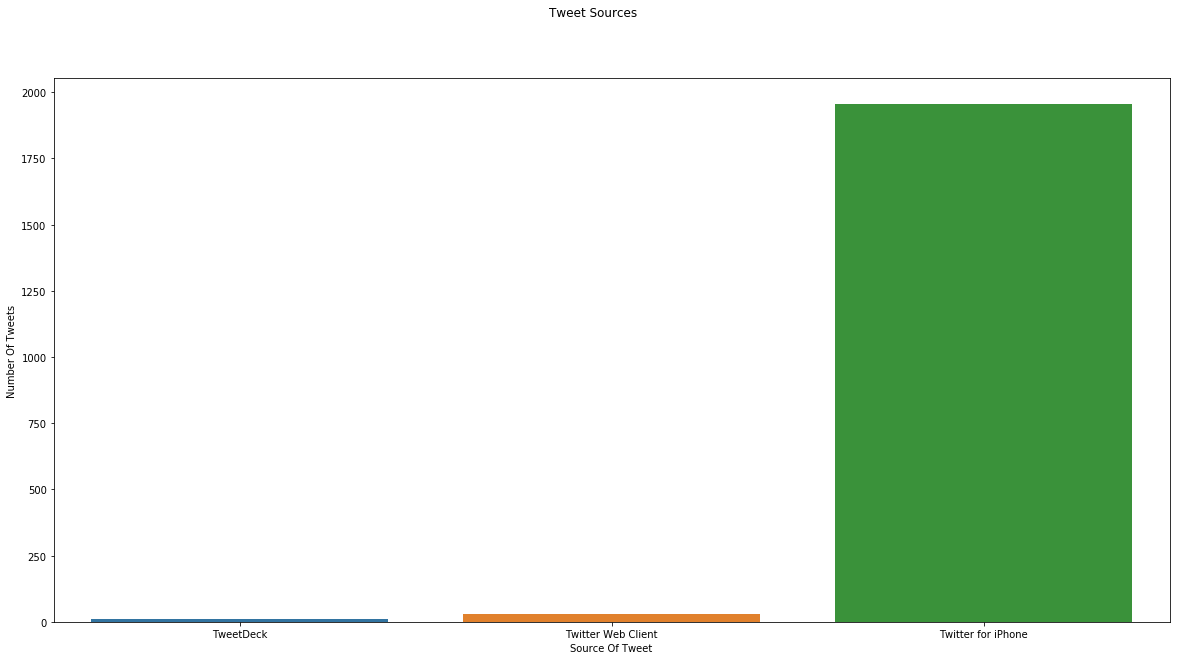

In [71]:
plt.figure(figsize=(20,10))
p = sns.countplot(data = master_clean, x ='source')
p.figure.suptitle('Tweet Sources');
plt.xlabel('Source Of Tweet');
plt.ylabel('Number Of Tweets');
plt.show()


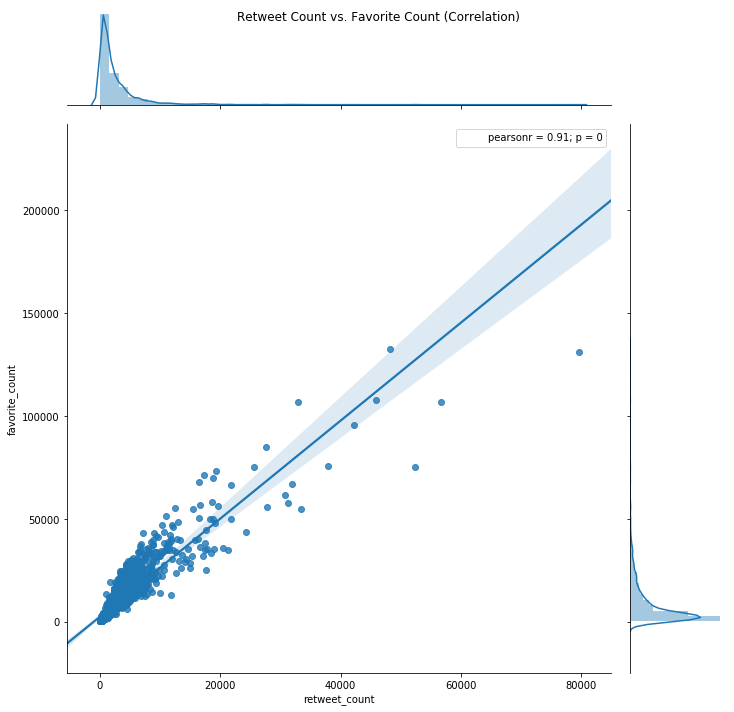

In [59]:
plt.figure(figsize=(20,10));
p = sns.jointplot(x=master_clean.retweet_count,y=master_clean.favorite_count, size=10, kind='reg');

p.fig.suptitle('Retweet Count vs. Favorite Count (Correlation)\n');

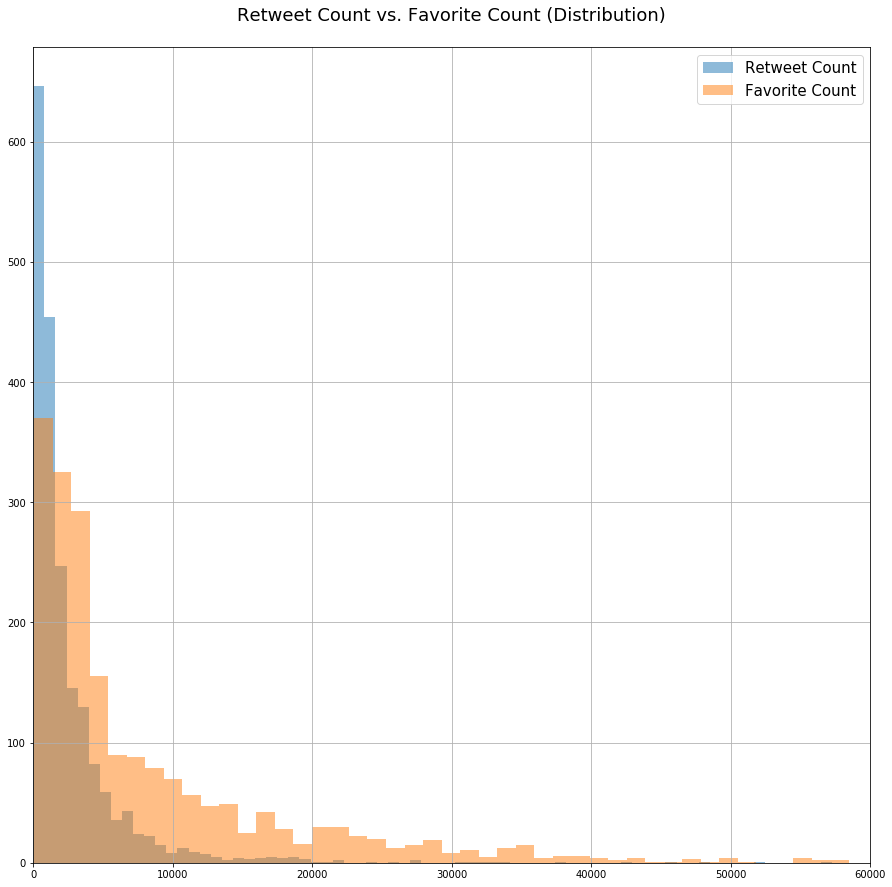

In [73]:
plt.figure(figsize=(15,15))
master_clean.retweet_count.hist(alpha=0.5, bins=100, label='Retweet Count')
master_clean.favorite_count.hist(alpha=0.5, bins=100, label='Favorite Count')
plt.title('Retweet Count vs. Favorite Count (Distribution)\n', size = 18)
plt.legend(loc='upper right', fontsize = 15)
plt.xlim(0,60000)
plt.show()